In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data for plotting
blocking_factors = [8, 16, 32, 64]
total_times = [1.87287, 1.48778, 1.48216, 1.27884]  # in seconds

# Bandwidth data (in GB/s)
global_load_throughput = [253.61, 286.27, 174.33, 201.59]
global_store_throughput = [169.07, 95.423, 58.111, 67.197]
shared_load_throughput = [1099.0, 2385.6, 2847.4, 3292.7]
shared_store_throughput = [338.14, 381.69, 232.44, 268.79]

# Bar graph for execution time
# plt.figure(figsize=(14, 10))


# Adjust bar spacing to have equal intervals
# plt.figure(figsize=(8, 6))

# Bar graph for execution time with equal spacing
spacing = np.arange(len(blocking_factors))  # Generate equal spacing for bars
width = 0.5 # width of each bar

bars = plt.bar(spacing, total_times, color='skyblue', width=0.6, label='Total Time (s)')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.3f}', ha='center', va='bottom')
plt.xlabel('Blocking Factor')
plt.ylabel('Total Time (s)')
plt.title('Execution Time vs Blocking Factor')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.xticks(spacing, blocking_factors)  # Set ticks to match the blocking factors
plt.legend()
plt.tight_layout()

plt.show()


# Bandwidth bar graph
x = np.arange(len(blocking_factors))  # X positions


# Data for plotting
x = np.arange(len(blocking_factors))  # x positions for the bars
width = 0.4 # width of each bar
# Calculate bandwidths

global_bandwidth = [gl + gs for gl, gs in zip(global_load_throughput, global_store_throughput)]
shared_bandwidth = [sl + ss for sl, ss in zip(shared_load_throughput, shared_store_throughput)]
total_bandwidth = [gb + sb for gb, sb in zip(global_bandwidth, shared_bandwidth)]

# Create the plot
fig, ax = plt.subplots()

# Bar charts for each bandwidth type
bars = ax.bar(x - width, global_bandwidth, width, label='Global Bandwidth (GB/s)', color='darksalmon')
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}', ha='center', va='bottom')
    
bars = ax.bar(x, shared_bandwidth, width, label='Shared Bandwidth (GB/s)', color='wheat')
# bars = ax.bar(x, total_bandwidth, width, label='Total Bandwidth (GB/s)', color='wheat')
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}', ha='center', va='bottom')

# Add labels, title, and legend
plt.grid(axis='y', linestyle='--', linewidth=0.5)
ax.set_xlabel('Blocking Factor')
ax.set_ylabel('Bandwidth (GB/s)')
ax.set_title('Memory Performance')
ax.set_xticks(x)
ax.set_xticklabels(blocking_factors)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

{'B8': 2.277419749045281, 'B16': 5.546180654611008, 'B32': 9.516318677489899, 'B64': 25.71983106422172}


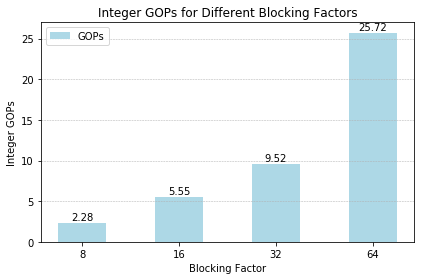

In [2]:
instructions = {
    "B8": 1669804160,
    "B16": 1969005056,
    "B32": 2567407616,
    "B64": 3071719424
}

execution_times = {
    "B8": 733.20 / 1000,  # Convert ms to seconds
    "B16": 355.02 / 1000,
    "B32": 269.79 / 1000,
    "B64": 119.43 / 1000
}

# Calculate GOPs
gops_values = {key: (instructions[key] / execution_times[key]) / 1e9 for key in instructions}
print(gops_values)
# Data for plotting
blocking_factors = ["8", "16", "32", "64"]
gops_values = [2.28, 5.55, 9.52, 25.72]

# Create the bar chart
# plt.figure(figsize=(8, 6))
plt.bar(blocking_factors, gops_values, color='lightblue', width=0.5, label='GOPs')

# Add labels and title
plt.xlabel('Blocking Factor')
plt.ylabel('Integer GOPs')
plt.title('Integer GOPs for Different Blocking Factors')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.legend()

# Annotate the bars with their values
for i, val in enumerate(gops_values):
    plt.text(i, val + 0.1, f'{val:.2f}', ha='center', va='bottom')

# Display the chart
plt.tight_layout()
plt.show()


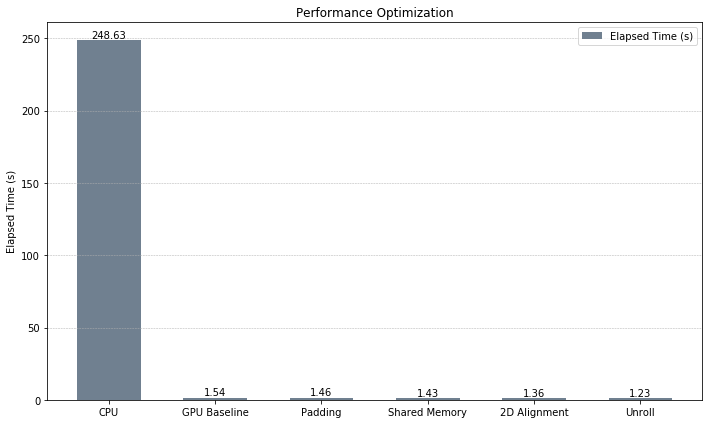

In [3]:
# Re-importing necessary libraries after reset
import matplotlib.pyplot as plt

# Data for elapsed time
methods = ["CPU", "GPU Baseline", "Padding", "Shared Memory", "2D Alignment", "Unroll"]
elapsed_times = [248.628, 1.53551, 1.46012, 1.42678, 1.35634, 1.22501]
# methods = ["GPU Baseline", "Padding", "Shared Memory", "2D Alignment", "Unroll"]
# elapsed_times = [1.53551, 1.46012, 1.42678, 1.35634, 1.22501]

# methods = ["GPU Baseline", "Shared Memory", "2D Alignment", "Unroll"]
# elapsed_times = [1.46012, 1.42678, 1.35634, 1.22501]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(methods, elapsed_times, color='slategrey', width=0.6, label='Elapsed Time (s)')

# Add labels and title
# plt.xlabel('Optimization Method')
plt.ylabel('Elapsed Time (s)')
plt.title('Performance Optimization')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.legend()

# Annotate the bars with their values
for i, val in enumerate(elapsed_times):
    plt.text(i, val + 0.02, f'{val:.2f}', ha='center', va='bottom')

# Display the chart
plt.tight_layout()
plt.show()


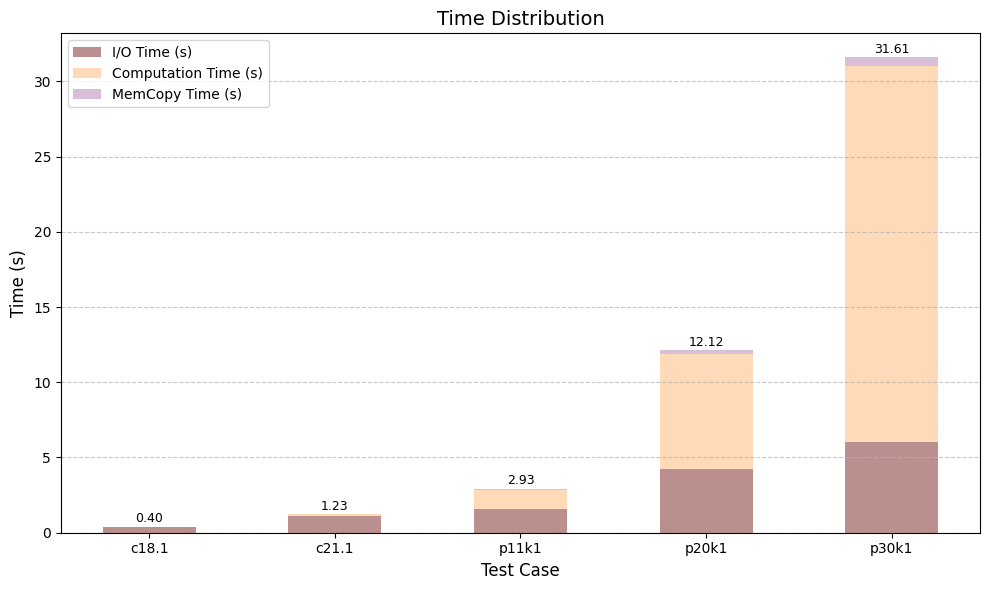

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for the table
data = {
    "Test Case": ["c18.1", "c21.1", "p11k1", "p20k1", "p30k1"],
    "Vertices (V)": [3000, 5000, 11000, 20000, 30000],
    "I/O Time (s)": [0.35591, 1.08539, 1.56145, 4.24485, 6.04498],
    "Computation Time (s)": [0.033578, 0.12909, 1.28922, 7.62229, 24.9961],
    "HtoD Time (s)": [0.0029764, 0.0084178, 0.039712, 0.13148, 0.29494],
    "DtoH Time (s)": [0.0027747, 0.0078286, 0.037012, 0.12258, 0.27227],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Combine HtoD and DtoH into MemCopy
df["MemCopy Time (s)"] = df["HtoD Time (s)"] + df["DtoH Time (s)"]

# Custom colors for each category
colors = {"I/O Time (s)": "rosybrown", "Computation Time (s)": "peachpuff", "MemCopy Time (s)": "thistle"}

# Plotting the time distribution
fig, ax = plt.subplots(figsize=(10, 6))

# Stacked bar chart
bottom = [0] * len(df["Test Case"])
for col in ["I/O Time (s)", "Computation Time (s)", "MemCopy Time (s)"]:
    ax.bar(
        df["Test Case"],
        df[col],
        label=col,
        bottom=bottom,
        color=colors[col],
        width = 0.5
    )
    # Update bottom for stacking
    bottom = [i + j for i, j in zip(bottom, df[col])]

# Annotate bars with total values
for i, total in enumerate(bottom):
    ax.text(
        i,
        total + 0.1,
        f"{total:.2f}",
        ha="center",
        va="bottom",
        fontsize=9,
    )

# Add labels and legend
ax.set_title("Time Distribution", fontsize=14)
ax.set_ylabel("Time (s)", fontsize=12)
ax.set_xlabel("Test Case", fontsize=12)
ax.legend(loc="upper left")
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()
